For this Section, we work with NAIP Dataset

**NAIP DATASET.**
The National Agriculture Imagery Program (NAIP) acquires aerial imagery during the agricultural growing seasons in the continental U.S. A primary goal of the NAIP program is to make digital ortho photography available to governmental agencies and the public within a year of acquisition.

NAIP is administered by the USDA’s Farm Service Agency (FSA) through the Aerial Photography Field Office in Salt Lake City. This “leaf-on” imagery is used as a base layer for GIS programs in FSA’s County Service Centers, and is used to maintain the Common Land Unit (CLU) boundaries. – USDA NAIP Program


**Open NAIP Data in Python**
Next, you will use NAIP imagery for the Coldsprings fire study area in Colorado. To work with multi-band raster data you will use the rioxarray and geopandas packages. You will also use the plot module from the earthpy package for raster plotting.

Before you get started, make sure that your working directory is set.

In [7]:
# !pip install rioxarray
# !pip install geopandas
# !pip install earthpy

In [8]:
import os

import matplotlib.pyplot as plt
import numpy as np
import rioxarray as rxr
import geopandas as gpd
import earthpy as et
import earthpy.plot as ep
import earthpy.spatial as es

# Get the data
data = et.data.get_data('cold-springs-fire')

# Set working directory
os.chdir(os.path.join(et.io.HOME, 'earth-analytics', 'data'))

plt.rcParams['figure.figsize'] = (10, 10)
plt.rcParams['axes.titlesize'] = 20

To begin, you will use the rioxarray open_rasterio function to open the multi-band NAIP image

rxr.open_rasterio("path-to-tif-file-here")

Don’t forget that with rioxarray you can automatically mask out the fill values of a raster with the argument masked=True in open_rasterio.

In [9]:
naip_csf_path = os.path.join("cold-springs-fire", 
                             "naip", 
                             "m_3910505_nw_13_1_20150919", 
                             "crop", 
                             "m_3910505_nw_13_1_20150919_crop.tif")

naip_csf = rxr.open_rasterio(naip_csf_path, masked=True)
naip_csf

<xarray.DataArray (band: 4, y: 2312, x: 4377)>
[40478496 values with dtype=float32]
Coordinates:
  * band         (band) int64 1 2 3 4
  * x            (x) float64 4.572e+05 4.572e+05 ... 4.615e+05 4.615e+05
  * y            (y) float64 4.427e+06 4.427e+06 ... 4.425e+06 4.425e+06
    spatial_ref  int64 0
Attributes:
    STATISTICS_MAXIMUM:  239
    STATISTICS_MEAN:     nan
    STATISTICS_MINIMUM:  32
    STATISTICS_STDDEV:   nan
    scale_factor:        1.0
    add_offset:          0.0

Layers (known as bands) in the Array

In [10]:
naip_csf.shape

(4, 2312, 4377)

Plotting Bands:

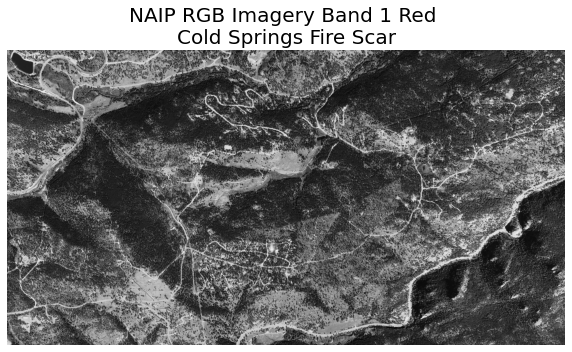

In [11]:
fig, ax = plt.subplots()

ax.imshow(naip_csf[0], 
          cmap="Greys_r")
ax.set_title("NAIP RGB Imagery Band 1 Red \nCold Springs Fire Scar")
ax.set_axis_off()
plt.show()

Plotting with Earthpy

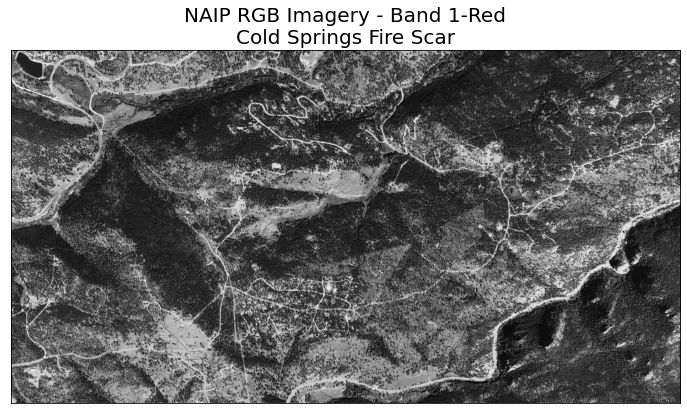

In [12]:
ep.plot_bands(naip_csf[0],
              title="NAIP RGB Imagery - Band 1-Red\nCold Springs Fire Scar",
              cbar=False)
plt.show()

Let us see the No. of Bands now:

In [13]:
naip_csf.band

<xarray.DataArray 'band' (band: 4)>
array([1, 2, 3, 4])
Coordinates:
  * band         (band) int64 1 2 3 4
    spatial_ref  int64 0

Image Raster Data Value

In [14]:
# View min and max value
print(naip_csf.min())
print(naip_csf.max())

<xarray.DataArray ()>
array(17., dtype=float32)
Coordinates:
    spatial_ref  int64 0
<xarray.DataArray ()>
array(242., dtype=float32)
Coordinates:
    spatial_ref  int64 0


This raster contains values between 0 and 255. These values represent degrees of brightness associated with the image band. In the case of a RGB image (red, green and blue), band 1 is the red band. When we plot the red band, larger numbers (towards 255) represent pixels with more red in them (a strong red reflection). Smaller numbers (towards 0) represent pixels with less red in them (less red was reflected).

To plot an RGB image, we mix red + green + blue values, using the ratio of each. The ratio of each color is determined by how much light was recorded (the reflectance value) in each band. This mixture creates one single color that, in turn, makes up the full color image - similar to the color image that your camera phone creates.

**8 vs 16 Bit Images**
It’s important to note that this image is an 8 bit image. This means that all values in the raster are stored within a range of 0:255. This differs from a 16-bit image, in which values can be stored within a range of 0:65,535.

In these lessons, you will work with 8-bit images. For 8-bit images, the brightest whites will be at or close to 255. The darkest values in each band will be closer to 0.

# **Plot A Specific Band**
You can plot a single band of your choice using numpy indexing. naip_csf[1] will access just the second band - which is the green band when using NAIP data.

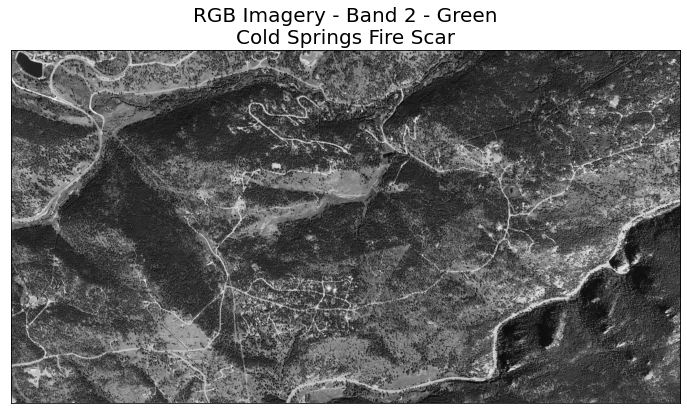

In [15]:
# Plot band 2 - green
ep.plot_bands(naip_csf[1],
              title="RGB Imagery - Band 2 - Green\nCold Springs Fire Scar",
              cbar=False)
plt.show()

# **Rasters and Numpy Arrays - A Review**
Remember that when you import a raster dataset into Python, the data are converted to an xarray object. A numpy array has no inherent spatial information attached to it, nor does an xarray object. The data are just a matrix of values. This makes processing the data fast.

The spatial information for the raster is stored in a .rio attribute which is available if you import rioxarray in your workflow. This rio attribute allows you to export the data as a geotiff or other spatial format.

**Plot Raster Band Images **
Next plot each band in the raster. This is another intermediate step (like plotting histograms) that you might want to do when you first explore and open your data. You will not need this for your homework but you might want to do it to explore other data that you use in your career. Earthpy contains a plot_bands() function that allows you to quickly plot each band individually.

Similar to plotting a single band, in each band “color”, the brightest pixels are lighter in color or white representing a stronger reflectance for that color on that pixel. The darkest pixels are darker to black in color representing less reflectance of that color in that pixel.



# **Plot Bands Using Earthpy**
You can use the earthpy package to plot a single or all bands in your array. To use earthpy call:

ep.plot_bands()

plot_bands() takes several key agruments including:

arr: an n-dimensional numpy array to plot.
figsize: a tuple of 2 values representing the x and y dimensions of the image.
cols: if you are plotting more than one band you can specify the number of columns in the grid that you’d like to plot.
title: OPTIONAL - A single title for one band or a list of x titles for x bands in your array.
cbar: OPTIONAL - ep.plot_bands() by default will add a colorbar to each plot it creates. You can turn the colobar off by setting this argument to false.

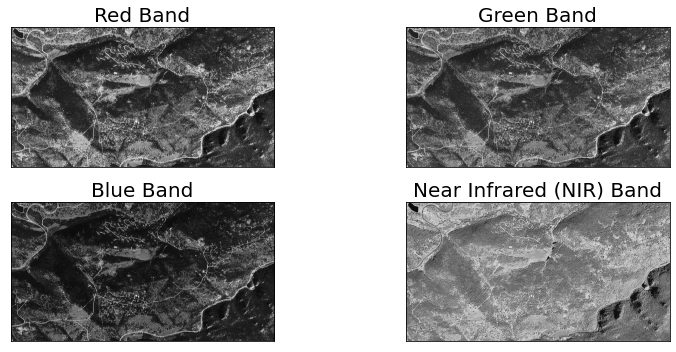

In [16]:
titles = ["Red Band", "Green Band", "Blue Band", "Near Infrared (NIR) Band"]

# Plot all bands using the earthpy function
ep.plot_bands(naip_csf, 
              figsize=(12, 5), 
              cols=2,
              title=titles,
              cbar=False)
plt.show()

Plot RGB Data in Python
Previously you have plotted individual bands using a greyscale color ramp in Python. Next, you will learn how to plot an RGB composite image. This type of image is similar in appearance to one you capture using a cell phone or digital camera.
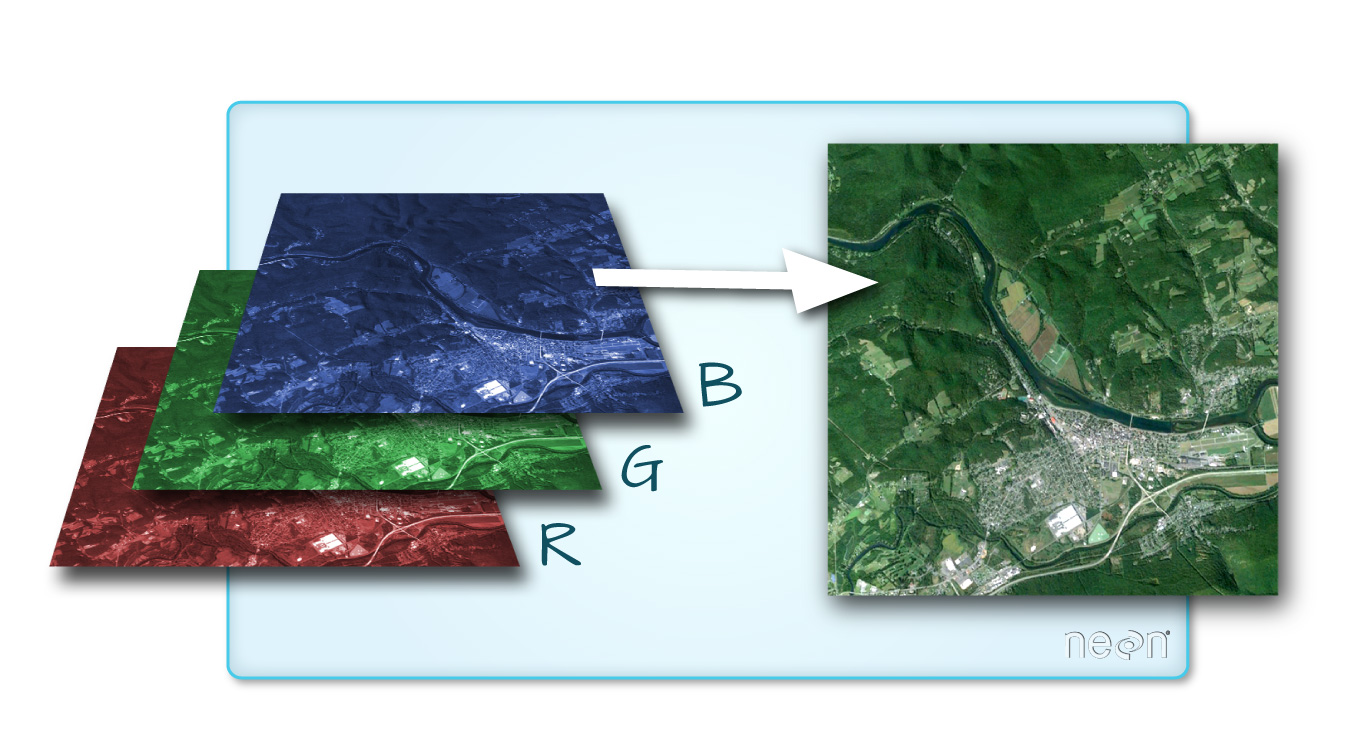
A true color image consists of 3 bands - red, green and blue. When composited or rendered together in a GIS, or even a image-editor like Photoshop the bands create a color image.
A "true" color image consists of 3 bands - red, green and blue. When composited or rendered together in a GIS, or even a image-editor like Photoshop the bands create a color image. Source: Colin Williams, NEON.
You can use the Earthpy function called plot_rgb() to quickly plot 3 band composite images. This function has several key arguments including

arr: a numpy array in rasterio band order (bands first)
rgb: the three bands that you wish to plot on the red, green and blue channels respectively
title: OPTIONAL - if you want to add a title to your plot.
Similar to plotting with geopandas, you can provide an ax= argument as well to plot your data on a particular matplotlib axis.

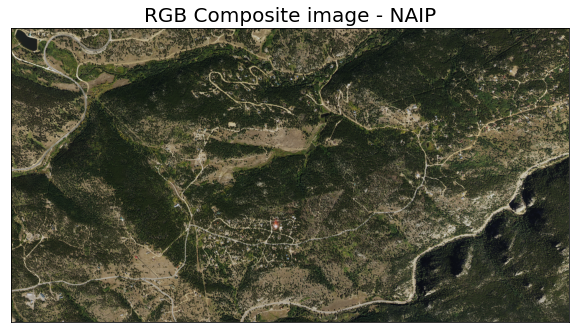

In [17]:
ep.plot_rgb(naip_csf.values,
            rgb=[0, 1, 2],
            title="RGB Composite image - NAIP")
plt.show()

Optionally, you can also provide the bands that you wish to plot, the title and the figure size.

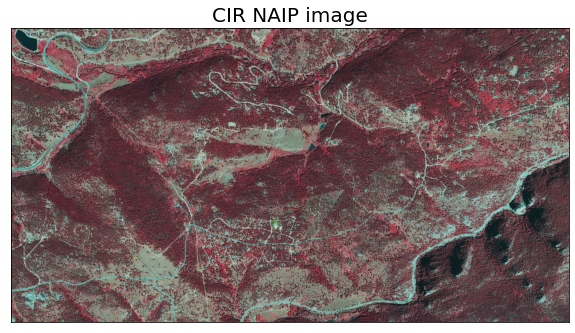

In [18]:
ep.plot_rgb(naip_csf.values, title="CIR NAIP image",
            rgb=[3, 0, 1],
            figsize=(10, 8))
plt.show()

**Image Stretch To Increase Contrast**

The image above looks pretty good. You can explore whether applying a stretch to the image improves clarity and contrast.

When the range of pixel brightness values is closer to 0, a darker image is rendered by default. You can stretch the values to extend to the full 0-255 range of potential values to increase the visual contrast of the image.
When the range of pixel brightness values is closer to 0, a darker image is rendered by default. You can stretch the values to extend to the full 0-255 range of potential values to increase the visual contrast of the image.
When the range of pixel brightness values is closer to 255, a lighter image is rendered by default. You can stretch the values to extend to the full 0-255 range of potential values to increase the visual contrast of the image.
When the range of pixel brightness values is closer to 255, a lighter image is rendered by default. You can stretch the values to extend to the full 0-255 range of potential values to increase the visual contrast of the image.
Below you use the skimage package to contrast stretch each band in your data to make the whites more bright and the blacks more dark.

In the example below you only stretch bands 0,1 and 2 which are the RGB bands. To begin,

preallocate an array of zeros that is the same shape as your numpy array.
then look through each band in the image and rescale it.
 Data Tip: Read more about image stretch on the scikit-image website.

For convenience we have also built a stretch feature into earthpy. You can call it using the stretch argument.

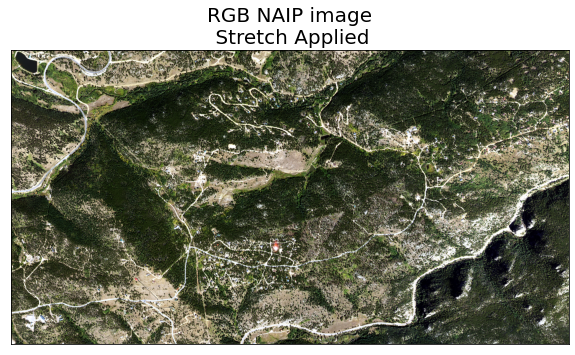

In [24]:
band_indices = [0, 1, 2]

# Apply stretch using the earthpy plot_rgb function
ep.plot_rgb(naip_csf.values,
            rgb=band_indices,
            title="RGB NAIP image\n Stretch Applied",
            figsize=(10, 8),
            stretch=True)
plt.show()

**Multiband Raster Histograms**

Just like you did with single band rasters, you can view a histogram of each band in your data using matplotlib. Below, you loop through each band or layer in the number array and plot the distribution of reflectance values.

You can use the ep.hist() function in earthpy to plot histograms for all bands in your raster. hist() accepts several key arguments including

arr: a numpy array in rasterio band order (bands first)
colors: a list of colors to use for each histogram.
title: plot titles to use for each histogram.
cols: the number of columns for the plot grid.

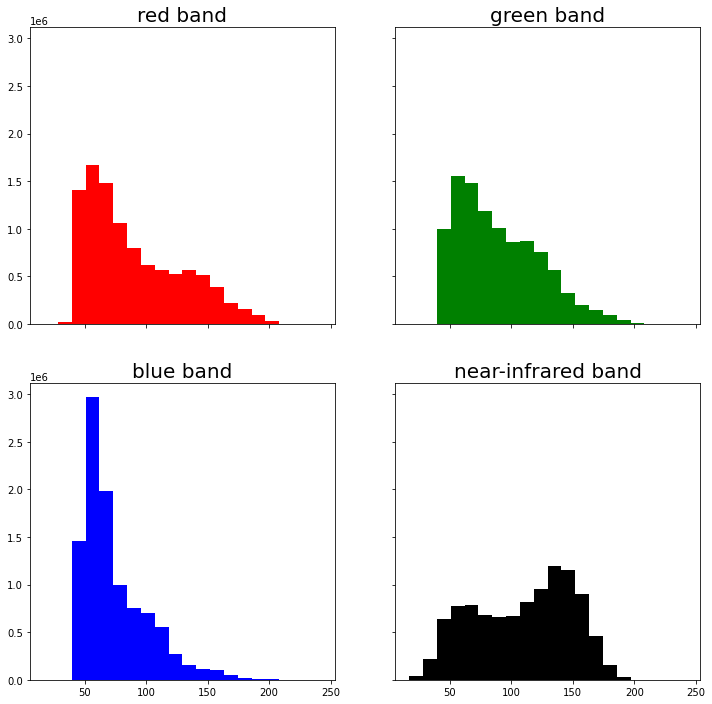

In [25]:
# Create a colors and titles list to use in the histogram, then plot
colors = ['r', 'g', 'b', 'k']
titles = ['red band', 'green band', 'blue band', 'near-infrared band']

ep.hist(naip_csf.values, 
        colors=colors, 
        title=titles, 
        cols=2)

plt.show()

How to reach me: Email: lawrencekimutai09@gmail.com

YOUTUBE Channel on Geospatial Data Science:## https://www.youtube.com/playlist?list=PLKmAxy6Caj2CQwPCduYdTH4eHAkIs6-rX

Twitter: https://twitter.com/lawrence_kim_?t=IgTw9ewUp1oQoKdcEirS5Q&s=09

Fiverr: https://www.fiverr.com/s2/fef0ee42cd

LinkedIn: https://www.linkedin.com/in/lawrence-kimutai-6184541ba

Github: https://github.com/KimutaiLawrence
